In [28]:
import gensim
import numpy
import numpy as np
import utils
import matplotlib
import matplotlib.pyplot as plt 
#old list
lst1=['אבי','הי"ו','הצעיר','הראשונים','הרה"ג','ואביו','והנ"י','ז"ל','זי"ע','זיע"א','זלה"ה','זללה"ה','זצ"ל','זצוק"ל'
      ,'זקני','יצ"ו','כמה"ר','כמוה"ר','מהר"ר','מו"ר','נ"י','נ"ר','נר"ו','סילט"א','ע"ה','שליט"א','תלמידי']
#new list
lst=['נר"ו','יצ"ו','זצוק"ל','הי"ו','זלה"ה','שליט"א','נ"י','עט"ר','זללה"ה','ז"ל','מו"ר','זי"ע','נ"ר',
"ני'",'ידידי','אהובי','ידי"נ','נ"ע','נלב"ע','מ"ר','שיחיה',"שיחי'",'אאמו"ר','מו"ח','זצלה"ה','זצוקללה"ה','ידינ"פ']


In [29]:
def heatmap(data, row_labels, col_labels,ratio = 1, ax=None,
            cbar_kw={}, cbarlabel="",w=False ,**kwargs):
    """
    Create a heatmap from a numpy array and two lists of labels.

    Parameters
    ----------
    data
        A 2D numpy array of shape (N, M).
    row_labels
        A list or array of length N with the labels for the rows.
    col_labels
        A list or array of length M with the labels for the columns.
    ax
        A `matplotlib.axes.Axes` instance to which the heatmap is plotted.  If
        not provided, use current axes or create a new one.  Optional.
    cbar_kw
        A dictionary with arguments to `matplotlib.Figure.colorbar`.  Optional.
    cbarlabel
        The label for the colorbar.  Optional.
    **kwargs
        All other arguments are forwarded to `imshow`.
    """

    if not ax:
        ax = plt.gca()

    # Plot the heatmap
    im = ax.imshow(data,aspect=ratio , **kwargs)

    # Create colorbar
    cbar = ax.figure.colorbar(im, ax=ax, **cbar_kw)
    cbar.ax.set_ylabel(cbarlabel, rotation=-90, va="bottom")

    # We want to show all ticks...
    ax.set_xticks(np.arange(data.shape[1]))
    ax.set_yticks(np.arange(data.shape[0]))
    # ... and label them with the respective list entries.
    ax.set_xticklabels(col_labels)
    ax.set_yticklabels(row_labels)

    # Let the horizontal axes labeling appear on top.
    ax.tick_params(top=True, bottom=False,
                   labeltop=True, labelbottom=False)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=-30, ha="right",
             rotation_mode="anchor")

    # Turn spines off and create white grid.
    # for edge, spine in ax.spines.items():
    #    spine.set_visible(False)

    ax.set_xticks(np.arange(data.shape[1]+1)-.5, minor=True)
    ax.set_yticks(np.arange(data.shape[0]+1)-.5, minor=True)
    if w:
        ax.grid(which="minor", color="w", linestyle='-', linewidth=3)
    ax.tick_params(which="minor", bottom=False, left=False)

    return im, cbar

In [30]:
a=gensim.models.Word2Vec.load("w2v_56_300dim_heb")

In [16]:
l,dim =utils.remove_dim_and_words(lst,a,dim_num=270)

In [31]:
l,dim =utils.remove_dim_and_words(utils.name_list(a.wv.most_similar('הרשב"א',topn=25)),a,dim_num=270)

In [5]:
dif_words=["פרה","דלת","מכונית","דלי","כסף","ניסן","נשים","פסול"]
zl=['זצ"ל','זללה"ה','ז"ל','זצל"ה','נ"ע','זצוק"ל','זלה"ה']
rabbi_names = ['מוהר"ד', 'הגרא"ח', 'מוהרש"ז', 'הגרע"י', 'מוהרי"א', 'מוהר"ש','הגריא"ה','הגרי"מ','הגריח"ז']
rishonim = [ 'הרשב"א','הריטב"א','הר"ן','הרמב"ן','הרא"ש','הרמ"ה','הרא"ה','הראב"ד','הרי"ף']
testlist=utils.remove_words_from_lst(lst,a,19)+zl+rabbi_names+rishonim+dif_words

In [5]:
def vec_from_lst(l,a):
    datavec=numpy.array([])
    for i in l:
        datavec=numpy.append(datavec,a.wv.word_vec( i ))
    datavec = datavec.reshape(len(l), len(a.wv.get_vector(l[0])))
    datavec.shape
    return datavec

datavec=numpy.array([])
l=utils.remove_words_from_lst(lst,a,19)

for i in l:
    datavec=numpy.append(datavec,a.wv.word_vec( i ))
datavec = np.append(datavec,utils.avg_vec_model(l,a))
l.append("avg_core_words")

for i in zl:
    datavec=numpy.append(datavec,a.wv.word_vec( i ))
datavec = np.append(datavec,utils.avg_vec_model(zl,a))
zl.append("avg_zl_words")

for i in rabbi_names:
    datavec=numpy.append(datavec,a.wv.word_vec( i ))
datavec = np.append(datavec,utils.avg_vec_model(rabbi_names,a))
rabbi_names.append("avg_rabbi_names_words")

for i in rishonim:
    datavec=numpy.append(datavec,a.wv.word_vec( i ))
datavec = np.append(datavec,utils.avg_vec_model(rishonim,a))
l.append("avg_rishonim_words")

datavec = datavec.reshape(len(l)+len(zl)+len(rabbi_names)+len(rishonim), len(a.wv.get_vector(l[0])))
datavec.shape
testlist=l+zl+rabbi_names+rishonim

In [32]:
datavec=vec_from_lst(l,a)

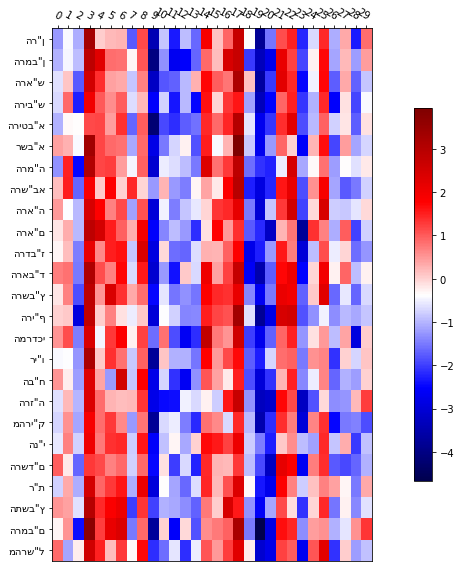

In [34]:

fig, ax = plt.subplots()

im, cbar = heatmap(datavec, l, range(len(a.wv.get_vector(l[0]))), ax=ax,
                   cmap="seismic",cbar_kw={'shrink': 0.7},ratio=2)
fig_size = plt.gcf().get_size_inches() #Get current size
sizefactor = 2 #Set a zoom factor
# Modify the current size by the factor
plt.gcf().set_size_inches(sizefactor * fig_size)
#texts = annotate_heatmap(im, valfmt="{x:.1f} t")
plt.title
fig.tight_layout()
plt.show()

In [23]:
z=["dfsf","qwertyuiop"]

In [27]:
str.r

AttributeError: 'str' object has no attribute 'reverse'

In [50]:
q=a.wv.get_vector(zl[2])

In [26]:
z

['qwertyuiop', 'dfsf']